In [140]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Insurance Cost Prediction using Linear Regression

This notebook predicts insurance charges for individuals based on their personal information such as age, sex, BMI, number of children, smoking status, and region.

Business Problem

Insurance companies need to estimate premiums for clients accurately. Predicting insurance costs helps in risk assessment, setting premiums, and making informed business decisions. This notebook demonstrates a simple machine learning solution for this problem.

1.Importing the Liberaries

In [177]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

2.Data Collection and Analysis

In [142]:
#Loading the dataset
insurance_dataset = pd.read_csv('/content/drive/MyDrive/insurance.csv')

3.Dataset Exploration

In [143]:
#First five rows of the dataFrame
insurance_dataset.head()   # Shows 7 columns, with age, sex , bmi, smokers or nun-somkers, region and charges in usd.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [144]:
#Number of Rows and Column in Dataset
insurance_dataset.shape # 1338 rows and 7 columns , medium-size dataset.

(1338, 7)

In [145]:
# Information about the dataset (1338 entries with 7 columns and non-null values with different datatypes)
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Information we got from the dataset is , we have 6 featuress(age, sex, bmi,children,smoker,region) and one target column(charges) and among the 6 features 3 are categorial features (sex, smokers and region ).

In [146]:
#To check if data has any missing values (double-check for null values)
insurance_dataset. isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data Analaysis with plots.

In [147]:
#Statistical Analysis about the dataset.(It gives statistical meanures of only numerical feature.)
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


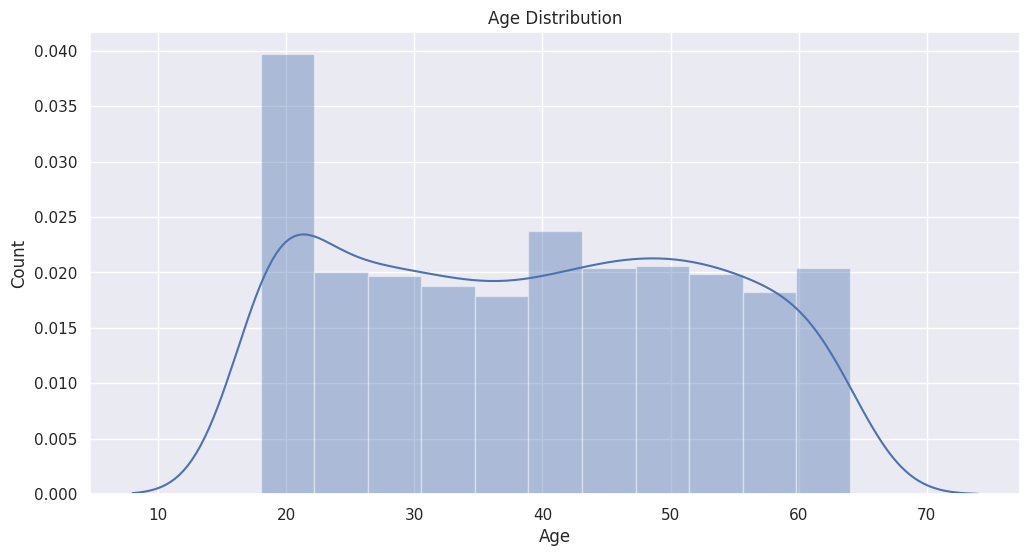

In [148]:
# Distribution of age value (distribution is almost normal,most of the agegrop fall under 18,20,22)
sns.set()
plt.figure(figsize= (12,6))
sns.distplot(insurance_dataset['age'],kde= True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

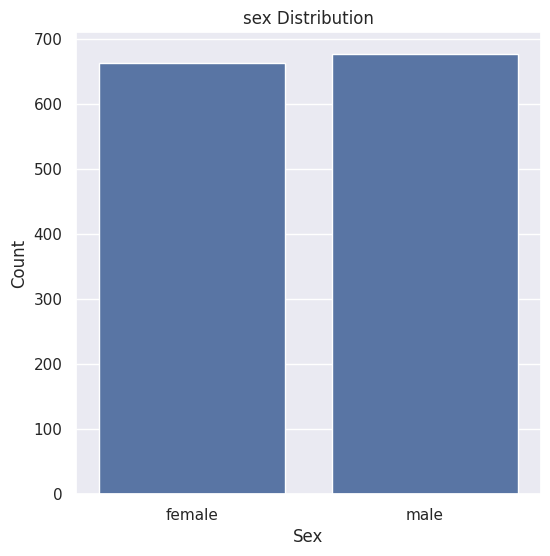

In [149]:
# sex column has two values male and female .(distribution for sex(male-female)is almost equal)
plt.figure(figsize=(6,6))
sns.countplot(x= 'sex',data= insurance_dataset)
plt.title('sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [150]:
# No of values for two cateroies male and female
insurance_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


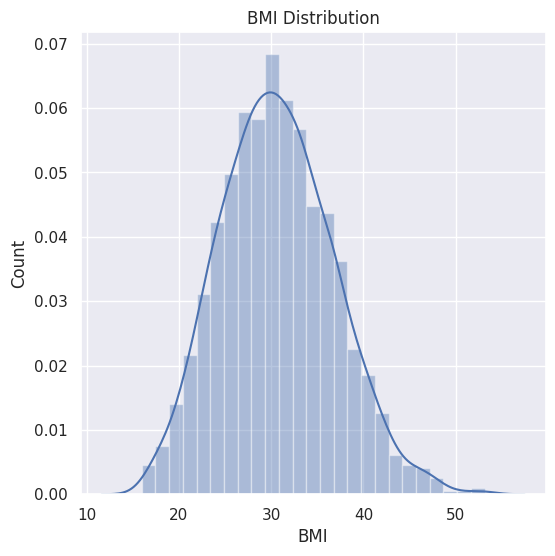

In [151]:
# to check bmi(body mass index)distribution(normal-distribution,more values are within 30(normal bmi range = (18.5 to 24.9)))
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

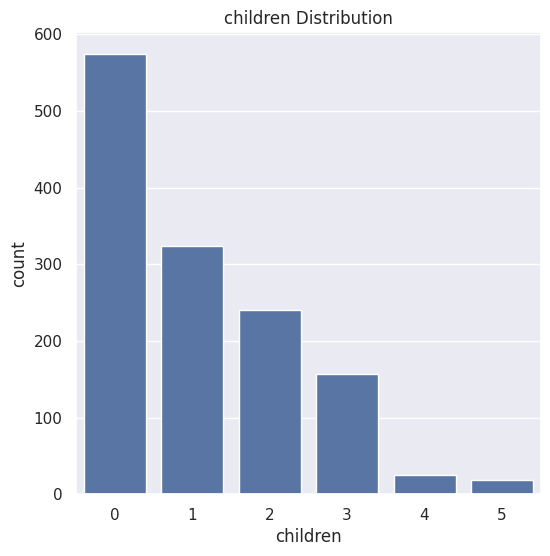

In [152]:
#childeren column (more people have no children,no of people with less number of childern are high )
plt.figure(figsize= (6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('children Distribution')
plt.xlabel('children')
plt.ylabel('count')
plt.show()

In [153]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


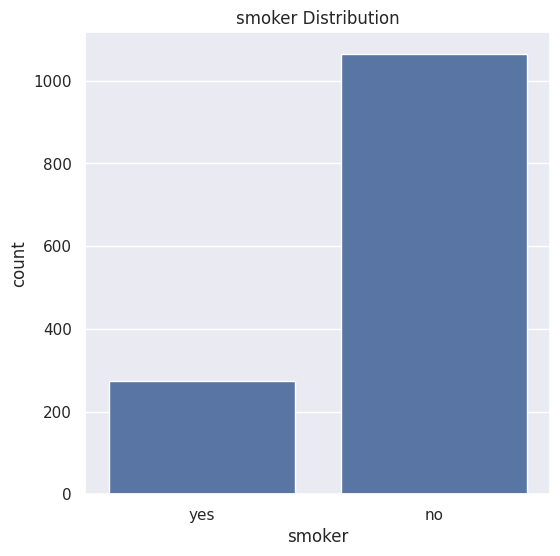

In [154]:
plt.figure(figsize= (6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker Distribution')
plt.xlabel('smoker')
plt.ylabel('count')
plt.show()

In [155]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


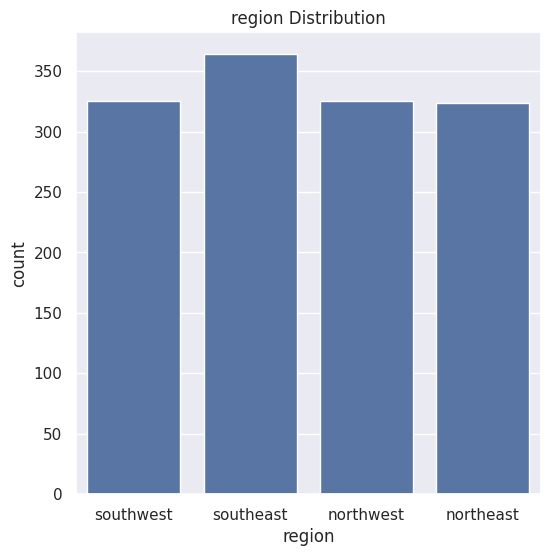

In [156]:
plt.figure(figsize= (6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region Distribution')
plt.xlabel('region')
plt.ylabel('count')
plt.show()

In [157]:
insurance_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<Figure size 600x600 with 0 Axes>

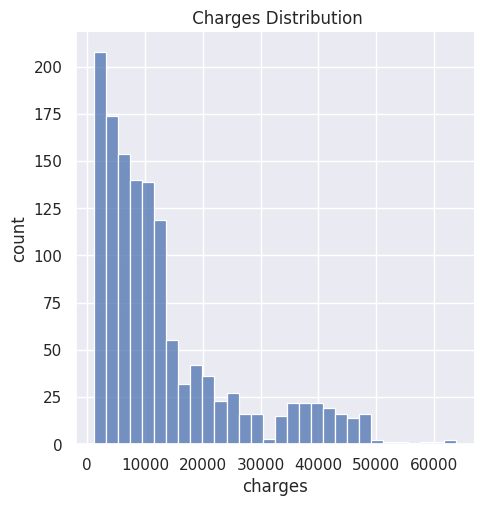

In [158]:
#charges Distribution(lot of data distributed under 10,000 value )plt.figure(figsize= (6,6))
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title(' Charges Distribution')
plt.xlabel('charges')
plt.ylabel('count')
plt.show()

4.Data Pre- Processing

In [159]:
#maping
insurance_dataset['sex'] = insurance_dataset['sex'].map({'male':0, 'female':1})
insurance_dataset['smoker'] = insurance_dataset['smoker'].map({'yes':0, 'no':1})
insurance_dataset['region'] = insurance_dataset['region'].map({'southeast':0,'southwest':1,'northeast':2,'northwest':3})

In [160]:
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,0,30.97,3,1,3,10600.5483
1334,18,1,31.92,0,1,2,2205.9808
1335,18,1,36.85,0,1,0,1629.8335
1336,21,1,25.80,0,1,1,2007.9450
1337,61,1,29.07,0,0,3,29141.3603


5.Spliting dataset into training and testing set

In [161]:
#spliting the features(x) and target(y)
x=insurance_dataset.drop(columns='charges',axis=1)
y=insurance_dataset['charges']

In [162]:
# contains all columns except 'charges'
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [163]:
print(y) #contains only dependent feature ('charges')

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [164]:
#spliting the data into training data and testing data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [165]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


5.Training Linear Regression Model

In [166]:
#Linear Regression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

6.Model Evalutaion

In [167]:
#prediction on training data
training_data_prediction=model.predict(x_train)
training_data_prediction

array([  478.49404197,  9317.75369733, 13193.79859142, ...,
       17327.55442479,  9600.51860822, 13753.18970971])

In [168]:
# R SQUARED VALUE
r2_train = r2_score(y_train,training_data_prediction)
print('R squared value:', r2_train)


R squared value: 0.751505643411174


In [169]:
# prediciton on testing data
testing_data_prediction=model.predict(x_test)


In [170]:
#R_squared value
r2_test = r2_score(y_test,testing_data_prediction)
print('R squared value:', r2_test)

R squared value: 0.7447273869684076


7.boulding a predictive system

In [171]:
input_data = (31,1,25.74,0,1,0)
# it is a touple data , changing it into numpy data
input_data_asnumpy_array= np.asarray(input_data)
#reshape the array
input_data_reshaped = input_data_asnumpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
print(f"The insurance cost is USD {prediction[0]:.2f}")


[3760.0805765]
The insurance cost is USD 3760.08


8.Visualization of Predictions

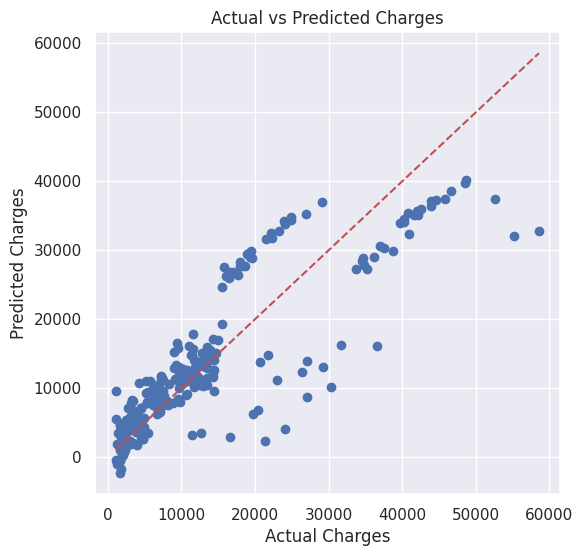

In [176]:
#Visualization of Predictions

plt.figure(figsize=(6,6))
plt.scatter(y_test, testing_data_prediction)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()




9.Conclusion & Business Insight

Conclusion:
- Linear Regression predicts insurance charges reasonably well.
- R-squared indicates most variance is explained.
- Encoding categorical variables correctly is crucial.


Business Insight:
- Insurance companies can use this model to set client premiums.
- Helps in risk assessment and offering personalized insurance plans.
- Can be extended to include medical history or lifestyle features for higher accuracy.